<a href="https://colab.research.google.com/github/GhazaleZe/Machine-learning-for-optimal-portfolios/blob/main/Copy_of_RandomForestCompAss4_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U -q PyDrive 

In [343]:
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np


def reading_data():
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)

  #F-F Research data factors
  file_id = '1JqjCLhMszamzs3_ihpqCVFskcZYicXYy' 


  download = drive.CreateFile({'id': file_id})

  #F-F Research data factors daily

  file_id_d = '1In0NkXHqz-QRlfivTTDaAbE2QFCrzZt6' 


  download_daily = drive.CreateFile({'id': file_id_d})

  # predicator 

  file_id_p = '1yyVF3ilhlD-GDc08BL2k_VJfLiUsbpEF'
  
  ## reading data
  download_predictor = drive.CreateFile({'id': file_id_p})
  download.GetContentFile('F-F_Research_Data_Factors.CSV')
  FF_monthly_df  = pd.read_csv("F-F_Research_Data_Factors.CSV")
  FF_monthly_df = FF_monthly_df [FF_monthly_df['Year_Month']>='192701']
  FF_monthly_df= FF_monthly_df.dropna()
  FF_monthly_df['Year_Month'] = FF_monthly_df['Year_Month'].astype(int)
  FF_monthly_df = FF_monthly_df [(FF_monthly_df['Year_Month']>=192701) & (FF_monthly_df['Year_Month']<202201)]
  FF_monthly_df['Year_Month'] = FF_monthly_df['Year_Month'].astype(str)
  FF_monthly_df.sort_values('Year_Month', ascending=True)

  FF_monthly_df['Mkt-RF']= FF_monthly_df['Mkt-RF'].astype(float)/100
  FF_monthly_df['RF']= FF_monthly_df['RF'].astype(float)/100

  download_daily.GetContentFile('F-F_Research_Data_Factors_daily.CSV')

  FF_daily_df  = pd.read_csv("F-F_Research_Data_Factors_daily.CSV")
  FF_daily_df = FF_daily_df.dropna()
  FF_daily_df['Mkt-RF']= FF_daily_df['Mkt-RF'].astype(float)/100
  FF_daily_df['RF']= FF_daily_df['RF'].astype(float)/100
  FF_daily_df['MKt'] = FF_daily_df['Mkt-RF'] + FF_daily_df['RF']
  #FF_daily_df['YYMMDD'] = FF_daily_df['YYMMDD'].astype(int)
  FF_daily_df = FF_daily_df [(FF_daily_df['YYMMDD']>= '19270101') & (FF_daily_df['YYMMDD'] <= '20211231')]

  download_predictor.GetContentFile('PredictorData2021Monthly.csv')
  Predictore_df  = pd.read_csv("PredictorData2021Monthly.csv")

  Predictore_df = Predictore_df[Predictore_df['yyyymm']>=192701]
  # delete column csp
  Predictore_df = Predictore_df.drop('csp' , axis=1)

  return FF_daily_df, FF_monthly_df, Predictore_df



FF_daily_df, FF_monthly_df, Predictore_df = reading_data()


FF_daily_df


,YYMMDD,Mkt-RF,SMB,HML,RF,MKt
150,19270103,-0.0079,0.19,0.09,0.0001,-0.0078
151,19270104,0.0031,0.14,-0.66,0.0001,0.0032
152,19270105,0.0014,0.46,-0.36,0.0001,0.0015
153,19270106,-0.0017,-0.05,0.15,0.0001,-0.0016
154,19270107,0.0030,-0.23,0.41,0.0001,0.0031
...,...,...,...,...,...,...
25143,20211227,0.0122,-0.11,0.29,0.0000,0.0122
25144,20211228,-0.0027,-0.60,0.81,0.0000,-0.0027
25145,20211229,0.0006,-0.07,0.17,0.0000,0.0006
25146,20211230,-0.0015,0.10,-0.40,0.0000,-0.0015


In [344]:
FF_monthly_df

,Year_Month,Mkt-RF,SMB,HML,RF
6,192701,-0.0006,-0.37,4.54,0.0025
7,192702,0.0418,0.04,2.94,0.0026
8,192703,0.0013,-1.65,-2.61,0.0030
9,192704,0.0046,0.3,0.81,0.0025
10,192705,0.0544,1.53,4.73,0.0030
...,...,...,...,...,...
1141,202108,0.0291,-0.43,-0.15,0.0000
1142,202109,-0.0437,0.72,5.09,0.0000
1143,202110,0.0665,-2.34,-0.49,0.0000
1144,202111,-0.0155,-1.32,-0.45,0.0000


In [345]:
from sklearn.preprocessing import StandardScaler


# select first column to exclude from normalization

holder = FF_monthly_df['Year_Month']
print(holder)
FF_monthly_df=FF_monthly_df.drop('Year_Month',axis=1)
print(FF_monthly_df)
# normalize DataFrame except for selected column
scaler2 = StandardScaler()
normalized2 = scaler2.fit_transform(FF_monthly_df.values)
normalized_df2 = pd.DataFrame(normalized2, columns=FF_monthly_df.columns)

# add excluded column back to normalized DataFrame
normalized_df2['Year_Month'] = holder.values



FF_monthly_df = normalized_df2
# print normalized DataFrame
FF_monthly_df

6       192701
7       192702
8       192703
9       192704
10      192705
         ...  
1141    202108
1142    202109
1143    202110
1144    202111
1145    202112
Name: Year_Month, Length: 1140, dtype: object
      Mkt-RF    SMB    HML      RF
6    -0.0006  -0.37   4.54  0.0025
7     0.0418   0.04   2.94  0.0026
8     0.0013  -1.65  -2.61  0.0030
9     0.0046    0.3   0.81  0.0025
10    0.0544   1.53   4.73  0.0030
...      ...    ...    ...     ...
1141  0.0291  -0.43  -0.15  0.0000
1142 -0.0437   0.72   5.09  0.0000
1143  0.0665  -2.34  -0.49  0.0000
1144 -0.0155  -1.32  -0.45  0.0000
1145  0.0310  -1.65   3.26  0.0001

[1140 rows x 4 columns]


,Mkt-RF,SMB,HML,RF,Year_Month
0,-0.140338,-0.180206,1.187111,-0.070503,192701
1,0.653012,-0.051290,0.734989,-0.030930,192702
2,-0.104787,-0.582673,-0.833310,0.127363,192703
3,-0.043040,0.030461,0.133101,-0.070503,192704
4,0.888772,0.417207,1.240801,0.127363,192705
...,...,...,...,...,...
1135,0.415381,-0.199071,-0.138172,-1.059834,202108
1136,-0.946786,0.162521,1.342528,-1.059834,202109
1137,1.115176,-0.799628,-0.234248,-1.059834,202110
1138,-0.419133,-0.478912,-0.222945,-1.059834,202111


0


In [346]:


# select first column to exclude from normalization
holder1 = FF_daily_df['YYMMDD']
print(holder1)
FF_daily_df=FF_daily_df.drop('YYMMDD',axis=1)
print(FF_daily_df)
# normalize DataFrame except for selected column
scaler3= StandardScaler()
normalized3 = scaler3.fit_transform(FF_daily_df.values)
normalized_df3 = pd.DataFrame(normalized3, columns=FF_daily_df.columns)

# add excluded column back to normalized DataFrame
normalized_df3['YYMMDD'] = holder1.values



FF_daily_df = normalized_df3
# print normalized DataFrame

FF_daily_df

150      19270103
151      19270104
152      19270105
153      19270106
154      19270107
           ...   
25143    20211227
25144    20211228
25145    20211229
25146    20211230
25147    20211231
Name: YYMMDD, Length: 24998, dtype: object
       Mkt-RF   SMB   HML      RF     MKt
150   -0.0079  0.19  0.09  0.0001 -0.0078
151    0.0031  0.14 -0.66  0.0001  0.0032
152    0.0014  0.46 -0.36  0.0001  0.0015
153   -0.0017 -0.05  0.15  0.0001 -0.0016
154    0.0030 -0.23  0.41  0.0001  0.0031
...       ...   ...   ...     ...     ...
25143  0.0122 -0.11  0.29  0.0000  0.0122
25144 -0.0027 -0.60  0.81  0.0000 -0.0027
25145  0.0006 -0.07  0.17  0.0000  0.0006
25146 -0.0015  0.10 -0.40  0.0000 -0.0015
25147 -0.0031  0.04  0.53  0.0000 -0.0031

[24998 rows x 5 columns]


,Mkt-RF,SMB,HML,RF,MKt,YYMMDD
0,-0.760837,0.312687,0.122486,-0.180870,-0.762927,19270103
1,0.258873,0.228190,-1.094937,-0.180870,0.256897,19270104
2,0.101282,0.768972,-0.607968,-0.180870,0.099288,19270105
3,-0.186091,-0.092899,0.219880,-0.180870,-0.188117,19270106
4,0.249603,-0.397089,0.641920,-0.180870,0.247626,19270107
...,...,...,...,...,...,...
24993,1.102452,-0.194295,0.447133,-1.017299,1.091299,20211227
24994,-0.278792,-1.022368,1.291213,-1.017299,-0.290099,20211228
24995,0.027121,-0.126698,0.252345,-1.017299,0.015848,20211229
24996,-0.167551,0.160593,-0.672897,-1.017299,-0.178846,20211230


# Random Forest Starts here

In [347]:
pre_df = pd.read_csv("predictor.csv")
pre_df = pre_df.drop('Unnamed: 0' , axis=1)
pre_df['Year_Month']= pre_df['Year_Month'].astype(str)
pre_df

,Year_Month,d/p,e/p,bm,ntis,tbl,ltr,dfy,tms,infl,corpr,svar,lag_ex_ret
0,192701,-2.942374,-2.374773,0.443706,0.050824,0.0323,0.0075,0.0095,-0.0248,-0.011299,0.0056,0.000470,0.013779
1,192702,-2.979535,-2.430353,0.428501,0.051668,0.0329,0.0088,0.0092,-0.0241,-0.005714,0.0069,0.000287,-0.023256
2,192703,-2.976535,-2.445079,0.469765,0.046357,0.0320,0.0253,0.0092,-0.0067,-0.005747,0.0083,0.000924,0.045091
3,192704,-2.984225,-2.471309,0.456754,0.050514,0.0339,-0.0005,0.0090,-0.0344,0.000000,0.0055,0.000603,0.003503
4,192705,-3.025963,-2.531446,0.434783,0.055275,0.0333,0.0109,0.0093,-0.0224,0.005780,-0.0011,0.000392,0.014729
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,202108,-4.342866,-3.282043,0.184756,0.014846,0.0005,-0.0035,0.0069,-0.0040,0.002066,-0.0045,0.000602,0.022748
1136,202109,-4.286281,-3.201224,0.193036,0.015598,0.0004,-0.0250,0.0070,-0.0254,0.002716,-0.0194,0.001393,0.028990
1137,202110,-4.346731,-3.226260,0.182389,0.013368,0.0005,0.0051,0.0067,0.0046,0.008308,0.0159,0.001151,-0.047569
1138,202111,-4.331997,-3.177747,0.189455,0.015640,0.0005,0.0210,0.0066,0.0205,0.004913,0.0094,0.001327,0.069144


## Can month separately be one of the factors?

In [348]:
Predictore_df = pd.merge(pre_df,FF_monthly_df, left_on='Year_Month', right_on='Year_Month', how='inner')

Predictore_df ['Mkt-RF_abs'] = np.abs(Predictore_df['Mkt-RF'])
Predictore_df = Predictore_df.drop(['SMB','HML','RF'] , axis=1)
Predictore_df['lag_ex_ret'] = Predictore_df['Mkt-RF'].shift(1)
Predictore_df = Predictore_df.dropna()
Predictore_df = Predictore_df.sort_values('Mkt-RF_abs',ascending=False).reset_index(drop=True)
rows_to_delete = int(0.1 * len(Predictore_df))

Predictore_df = Predictore_df.drop(index=Predictore_df.index[:rows_to_delete])
Predictore_df = Predictore_df.sort_values('Year_Month',ascending=True).reset_index(drop=True)
Predictore_df = Predictore_df.drop('Mkt-RF_abs',axis=1)
Predictore_df

,Year_Month,d/p,e/p,bm,ntis,tbl,ltr,dfy,tms,infl,corpr,svar,lag_ex_ret,Mkt-RF
0,192702,-2.979535,-2.430353,0.428501,0.051668,0.0329,0.0088,0.0092,-0.0241,-0.005714,0.0069,0.000287,-0.140338,0.653012
1,192703,-2.976535,-2.445079,0.469765,0.046357,0.0320,0.0253,0.0092,-0.0067,-0.005747,0.0083,0.000924,0.653012,-0.104787
2,192704,-2.984225,-2.471309,0.456754,0.050514,0.0339,-0.0005,0.0090,-0.0344,0.000000,0.0055,0.000603,-0.104787,-0.043040
3,192705,-3.025963,-2.531446,0.434783,0.055275,0.0333,0.0109,0.0093,-0.0224,0.005780,-0.0011,0.000392,-0.043040,0.888772
4,192706,-3.007309,-2.531330,0.452385,0.058822,0.0307,-0.0069,0.0097,-0.0376,0.011494,0.0043,0.000825,0.888772,-0.566951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,202108,-4.342866,-3.282043,0.184756,0.014846,0.0005,-0.0035,0.0069,-0.0040,0.002066,-0.0045,0.000602,0.108519,0.415381
1022,202109,-4.286281,-3.201224,0.193036,0.015598,0.0004,-0.0250,0.0070,-0.0254,0.002716,-0.0194,0.001393,0.415381,-0.946786
1023,202110,-4.346731,-3.226260,0.182389,0.013368,0.0005,0.0051,0.0067,0.0046,0.008308,0.0159,0.001151,-0.946786,1.115176
1024,202111,-4.331997,-3.177747,0.189455,0.015640,0.0005,0.0210,0.0066,0.0205,0.004913,0.0094,0.001327,1.115176,-0.419133


# Normalize Data

In [349]:

from sklearn.preprocessing import StandardScaler


# select first column to exclude from normalization
col_to_exclude = Predictore_df.columns[0]

# get column index
col_idx = Predictore_df.columns.get_loc(col_to_exclude)

# normalize DataFrame except for selected column
scaler = StandardScaler()
normalized = scaler.fit_transform(Predictore_df.iloc[:, 1:].values)
normalized_df = pd.DataFrame(normalized, columns=Predictore_df.columns[1:])

# add excluded column back to normalized DataFrame
normalized_df.insert(0, col_to_exclude, Predictore_df[col_to_exclude])
Predictore_df = normalized_df
# print normalized DataFrame
Predictore_df


,Year_Month,d/p,e/p,bm,ntis,tbl,ltr,dfy,tms,infl,corpr,svar,lag_ex_ret,Mkt-RF
0,192702,0.955483,0.787365,-0.447878,1.508403,-0.013657,0.180232,-0.209004,0.126656,-1.681713,0.084196,-0.504889,-0.233100,0.923033
1,192703,0.961933,0.751395,-0.286234,1.283748,-0.043625,0.881275,-0.209004,0.600377,-1.688375,0.151546,-0.306880,0.663235,-0.261104
2,192704,0.945398,0.687327,-0.337202,1.459605,0.019641,-0.214901,-0.245300,-0.153765,-0.522541,0.016847,-0.406872,-0.192934,-0.164619
3,192705,0.855649,0.540436,-0.423270,1.661008,-0.000338,0.269456,-0.190856,0.172939,0.650031,-0.300658,-0.472430,-0.123172,1.291431
4,192706,0.895761,0.540719,-0.354316,1.811023,-0.086912,-0.486821,-0.118263,-0.240886,1.809126,-0.040881,-0.337852,0.929599,-0.983282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,202108,-1.976048,-1.292960,-1.402695,-0.049142,-1.092511,-0.342363,-0.626410,0.673886,-0.103461,-0.464220,-0.407026,0.048062,0.551711
1022,202109,-1.854373,-1.095554,-1.370258,-0.017324,-1.095840,-1.255843,-0.608262,0.091263,0.028407,-1.181010,-0.160984,0.394757,-1.576812
1023,202110,-1.984358,-1.156706,-1.411965,-0.111636,-1.092511,0.023029,-0.662707,0.908024,1.162803,0.517156,-0.236325,-1.144234,1.645211
1024,202111,-1.952677,-1.038210,-1.384288,-0.015551,-1.092511,0.698579,-0.680855,1.340907,0.474172,0.204463,-0.181745,1.185393,-0.752302


In [350]:
train_Predictore_df = Predictore_df[Predictore_df['Year_Month'] <'195801']
valid_Predictore_df = Predictore_df[(Predictore_df['Year_Month'] >= '195801') & (Predictore_df['Year_Month'] <'198901')]
test_Predictore_df = Predictore_df[Predictore_df['Year_Month'] >= '198901']
train_Predictore_df

,Year_Month,d/p,e/p,bm,ntis,tbl,ltr,dfy,tms,infl,corpr,svar,lag_ex_ret,Mkt-RF
0,192702,0.955483,0.787365,-0.447878,1.508403,-0.013657,0.180232,-0.209004,0.126656,-1.681713,0.084196,-0.504889,-0.233100,0.923033
1,192703,0.961933,0.751395,-0.286234,1.283748,-0.043625,0.881275,-0.209004,0.600377,-1.688375,0.151546,-0.306880,0.663235,-0.261104
2,192704,0.945398,0.687327,-0.337202,1.459605,0.019641,-0.214901,-0.245300,-0.153765,-0.522541,0.016847,-0.406872,-0.192934,-0.164619
3,192705,0.855649,0.540436,-0.423270,1.661008,-0.000338,0.269456,-0.190856,0.172939,0.650031,-0.300658,-0.472430,-0.123172,1.291431
4,192706,0.895761,0.540719,-0.354316,1.811023,-0.086912,-0.486821,-0.118263,-0.240886,1.809126,-0.040881,-0.337852,0.929599,-0.983282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,195708,0.369773,0.440868,0.176943,0.839496,0.012982,-0.185160,-0.571966,-0.129262,-0.522541,-0.291036,0.073386,-0.080892,-1.793173
316,195709,0.519470,0.608781,0.318538,0.776408,0.066258,0.129247,-0.408633,0.028645,-0.522541,0.209274,-0.122534,-1.300670,-2.047543
317,195710,0.601720,0.664820,0.403134,0.947601,0.082907,-0.406095,-0.263448,-0.328007,-0.522541,-0.137095,0.940453,-1.484588,-1.562193
318,195711,0.579546,0.602016,0.353484,1.056738,-0.006997,2.070923,-0.045671,1.332739,0.194261,1.248378,0.490892,-1.133664,0.373360


In [170]:
#train_Predictore_df.corr()


<ipython-input-170-cdc002c98b33>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_Predictore_df.corr()


,d/p,e/p,bm,ntis,tbl,ltr,dfy,tms,infl,corpr,svar,lag_ex_ret,Mkt-RF
d/p,1.000000,0.710102,0.751680,-0.318405,-0.327146,0.075840,0.286521,0.284239,-0.042008,-0.012271,0.286947,0.125523,-0.109376
e/p,0.710102,1.000000,0.451830,-0.223106,-0.067047,-0.032702,-0.294392,0.027893,0.089805,-0.150319,-0.193655,0.119026,-0.009287
bm,0.751680,0.451830,1.000000,-0.635132,-0.520590,0.116291,0.382259,0.449546,0.006993,0.057717,0.436093,0.194196,-0.075579
ntis,-0.318405,-0.223106,-0.635132,1.000000,0.616523,-0.099526,-0.266609,-0.508352,-0.093073,0.061106,-0.151024,-0.128194,-0.024460
tbl,-0.327146,-0.067047,-0.520590,0.616523,1.000000,-0.089363,-0.359294,-0.779193,-0.145891,-0.068084,-0.123786,-0.002650,-0.031624
ltr,0.075840,-0.032702,0.116291,-0.099526,-0.089363,1.000000,0.174657,0.693908,-0.160568,0.542833,0.122586,-0.015128,0.055302
dfy,0.286521,-0.294392,0.382259,-0.266609,-0.359294,0.174657,1.000000,0.369666,-0.276035,0.212117,0.675226,0.090292,-0.060069
tms,0.284239,0.027893,0.449546,-0.508352,-0.779193,0.693908,0.369666,1.000000,0.004428,0.390828,0.166635,-0.007604,0.057665
infl,-0.042008,0.089805,0.006993,-0.093073,-0.145891,-0.160568,-0.276035,0.004428,1.000000,-0.141924,-0.247490,-0.083555,-0.057958
corpr,-0.012271,-0.150319,0.057717,0.061106,-0.068084,0.542833,0.212117,0.390828,-0.141924,1.000000,0.102784,-0.003110,0.078250


## Max Feature test

In [351]:
import math
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score


x_train = train_Predictore_df.iloc[:,:13]
#x_train = x_train.drop(['Year_Month','tms','bm'], axis=1)
x_train = x_train.drop(['Year_Month'], axis=1)
y_train = train_Predictore_df.iloc[:,13]

x_valid = valid_Predictore_df.iloc[:,:13]
#x_valid = x_valid.drop(['Year_Month','tms','bm'], axis=1)
x_valid = x_valid.drop(['Year_Month'], axis=1)
y_valid = valid_Predictore_df.iloc[:,13]
      

maxfeatures = list(range(3, 12,3))
maxfeatures.append(int(math.sqrt(len(x_train.columns))))
maxfeatures.append(int(math.log2(len(x_train.columns))))
dict_winner = {}
min_samples_split_list = [0.2,0.5,0.9]
best_min_samples_split_list=[]
estimator=[50,200,500]
for i in maxfeatures:
  best_depth = []
  for e in estimator:
    
    for j in min_samples_split_list:
      
      for k in range(1,20,3):
        regressor = RandomForestRegressor(n_estimators=e, max_depth = k,max_features=i,min_samples_split=j,random_state=42)
        regressor.fit(x_train, y_train)    
        y_pred = regressor.predict(x_valid)
              #mse = mean_squared_error(y_valid, y_pred)
        r2 = r2_score(y_valid, y_pred)
        best_depth.append([r2,j,k,e])
      
      
  dict_winner[i] = [max(best_depth)]

dict_winner

{3: [[0.016982881997552712, 0.2, 19, 50]],
 6: [[-0.00537510931784646, 0.5, 19, 50]],
 9: [[-0.019871549705868574, 0.9, 19, 50]]}

In [178]:
x_train

,d/p,e/p,bm,ntis,tbl,ltr,dfy,tms,infl,corpr,svar,lag_ex_ret
0,-2.979535,-2.430353,0.428501,0.051668,0.0329,0.0088,0.0092,-0.0241,-0.005714,0.0069,0.000287,-0.0006
1,-2.976535,-2.445079,0.469765,0.046357,0.0320,0.0253,0.0092,-0.0067,-0.005747,0.0083,0.000924,0.0418
2,-2.984225,-2.471309,0.456754,0.050514,0.0339,-0.0005,0.0090,-0.0344,0.000000,0.0055,0.000603,0.0013
3,-3.025963,-2.531446,0.434783,0.055275,0.0333,0.0109,0.0093,-0.0224,0.005780,-0.0011,0.000392,0.0046
4,-3.007309,-2.531330,0.452385,0.058822,0.0307,-0.0069,0.0097,-0.0376,0.011494,0.0043,0.000825,0.0544
...,...,...,...,...,...,...,...,...,...,...,...,...
311,-3.251924,-2.572209,0.588005,0.035854,0.0337,0.0002,0.0072,-0.0335,0.000000,-0.0009,0.002147,0.0066
312,-3.182306,-2.503465,0.624151,0.034363,0.0353,0.0076,0.0081,-0.0277,0.000000,0.0095,0.001517,-0.0511
313,-3.144055,-2.480523,0.645746,0.038410,0.0358,-0.0050,0.0089,-0.0408,0.000000,0.0023,0.004936,-0.0598
314,-3.154367,-2.506235,0.633072,0.040990,0.0331,0.0533,0.0101,0.0202,0.003534,0.0311,0.003490,-0.0432


Not for main code

In [8]:
# X_train_df = Predictore_df[Predictore_df['Year_Month'] <'198901']

# test_Predictore_df = Predictore_df[Predictore_df['Year_Month'] >= '198901']
# x_train_larg = X_train_df.iloc[:,:13]
# #x_train_larg = x_train_larg.drop(['Year_Month','tms','bm'], axis=1)
# x_train_larg = x_train_larg.drop(['Year_Month'], axis=1)

# y_train_larg= X_train_df.iloc[:,13]
# test_Predictore_df =test_Predictore_df.dropna()

# x_test = test_Predictore_df.iloc[:,:13]
# #x_test = x_test.drop(['Year_Month','tms','bm'], axis=1)
# x_test = x_test.drop(['Year_Month'], axis=1)

# y_test = test_Predictore_df.iloc[:,13]
# r2_main_list = []
# for i in dict_winner:
#   regressor = RandomForestRegressor(n_estimators=dict_winner[i][0][3], max_depth = dict_winner[i][0][2],max_features=i,min_samples_split=dict_winner[i][0][1])
#   regressor.fit(x_train_larg, y_train_larg)    
#   y_pred_test = regressor.predict(x_test)

#   r2_main = r2_score(y_test, y_pred_test)
#   r2_main_list.append(r2_main)
# r2_main_list

[0.02967733076082968,
 0.022122380714796552,
 0.024872451996474032,
 0.02147010801729765,
 0.015023753036733312,
 0.029621944715930826,
 -0.0058524686392256164,
 -0.005835228076028098,
 0.029025681546823945]

# Adding one by one to train

In [352]:
X_train_df = Predictore_df[Predictore_df['Year_Month'] <'198901']

test_Predictore_df = Predictore_df[Predictore_df['Year_Month'] >= '198901']
x_train_larg = X_train_df.iloc[:,:13]
#x_train_larg = x_train_larg.drop(['Year_Month','tms','bm'], axis=1)
x_train_larg = x_train_larg.drop(['Year_Month'], axis=1)

y_train_larg= X_train_df.iloc[:,13]
test_Predictore_df =test_Predictore_df.dropna()

x_test = test_Predictore_df.iloc[:,:13]
#x_test = x_test.drop(['Year_Month','tms','bm'], axis=1)
x_test = x_test.drop(['Year_Month'], axis=1)



regressor = RandomForestRegressor(n_estimators=50, max_depth =19,max_features=3,min_samples_split=0.2,random_state=42)
regressor.fit(x_train_larg, y_train_larg)    
y_pred_all = regressor.predict(x_test)
y_pred_all.mean()

0.07901205343388337

In [353]:
X_train_df = Predictore_df[Predictore_df['Year_Month'] <'198901']

test_Predictore_df = Predictore_df[Predictore_df['Year_Month'] >= '198901']
x_train_larg = X_train_df.iloc[:,:13]
#x_train_larg = x_train_larg.drop(['Year_Month','tms','bm'], axis=1)
x_train_larg = x_train_larg.drop(['Year_Month'], axis=1)

y_train_larg= X_train_df.iloc[:,13]
test_Predictore_df =test_Predictore_df.dropna()

x_test = test_Predictore_df.iloc[:,:13]
#x_test = x_test.drop(['Year_Month','tms','bm'], axis=1)
x_test = x_test.drop(['Year_Month'], axis=1)

y_test = test_Predictore_df.iloc[:,13]
r2_adding_list = []
y_pred_test = []
for i in range(len(x_test)):
  regressor = RandomForestRegressor(n_estimators=50, max_depth =19,max_features=3,min_samples_split=0.2,random_state=42)
  regressor.fit(x_train_larg, y_train_larg)    
  y_pred_test_temp = regressor.predict((x_test.iloc[i:i+1,:]))

  y_pred_test.append(y_pred_test_temp)
  # r2_adding = r2_score(y_test, y_pred_test)
  # r2_adding_list.append(r2_adding)
  x_train_larg = pd.concat([x_train_larg,x_test.iloc[i:i+1,:]],ignore_index=True)
  #print(x_train_larg)
  s = pd.Series(y_test.iloc[i])
  y_train_larg = pd.concat([y_train_larg,s],ignore_index=True)
  #y_train_larg.columns = y_train_larg.columns.astype(str)

y_train_larg

0       0.923033
1      -0.261104
2      -0.164619
3       1.291431
4      -0.983282
          ...   
1021    0.551711
1022   -1.576812
1023    1.645211
1024   -0.752302
1025    0.607263
Length: 1026, dtype: float64

In [354]:
x_train_larg

,d/p,e/p,bm,ntis,tbl,ltr,dfy,tms,infl,corpr,svar,lag_ex_ret
0,0.955483,0.787365,-0.447878,1.508403,-0.013657,0.180232,-0.209004,0.126656,-1.681713,0.084196,-0.504889,-0.233100
1,0.961933,0.751395,-0.286234,1.283748,-0.043625,0.881275,-0.209004,0.600377,-1.688375,0.151546,-0.306880,0.663235
2,0.945398,0.687327,-0.337202,1.459605,0.019641,-0.214901,-0.245300,-0.153765,-0.522541,0.016847,-0.406872,-0.192934
3,0.855649,0.540436,-0.423270,1.661008,-0.000338,0.269456,-0.190856,0.172939,0.650031,-0.300658,-0.472430,-0.123172
4,0.895761,0.540719,-0.354316,1.811023,-0.086912,-0.486821,-0.118263,-0.240886,1.809126,-0.040881,-0.337852,0.929599
...,...,...,...,...,...,...,...,...,...,...,...,...
1021,-1.976048,-1.292960,-1.402695,-0.049142,-1.092511,-0.342363,-0.626410,0.673886,-0.103461,-0.464220,-0.407026,0.048062
1022,-1.854373,-1.095554,-1.370258,-0.017324,-1.095840,-1.255843,-0.608262,0.091263,0.028407,-1.181010,-0.160984,0.394757
1023,-1.984358,-1.156706,-1.411965,-0.111636,-1.092511,0.023029,-0.662707,0.908024,1.162803,0.517156,-0.236325,-1.144234
1024,-1.952677,-1.038210,-1.384288,-0.015551,-1.092511,0.698579,-0.680855,1.340907,0.474172,0.204463,-0.181745,1.185393


In [355]:
print(len(y_pred_test))
pd.Series(y_pred_test).mean()

365


array([0.05434413])

## Accuracy

In [356]:
y_pred_test
y_pred_test_s = []
for k in range(len(y_pred_test)):
  y_pred_test_s.append(y_pred_test[k][0])
y_test = y_test.reset_index(drop=True)
y_test_MKT = y_test
y_pred_test_s = pd.Series(y_pred_test_s)
def calculate_r2(actual_values, forecast_values):
    numerator = sum([(forecast_values[i] - actual_values[i])**2 for i in range(len(actual_values))])
    denominator = sum([(actual_values.mean() - actual_values[i])**2 for i in range(len(actual_values))])
    r2 = 1 - (numerator / denominator)
    return r2

calculate_r2(y_test_MKT,y_pred_test_s)


0.027586859779731965

In [357]:
y_test

0      1.484402
1     -0.956967
2      0.159923
3      0.966890
4      0.680358
         ...   
360    0.551711
361   -1.576812
362    1.645211
363   -0.752302
364    0.607263
Name: Mkt-RF, Length: 365, dtype: float64

In [358]:
x_test_added = x_test
x_test_added['MKt-RF']  = y_test.values
# x_test_added  = pd.concat([x_test_added ,y_pred_test_s],ignore_index=True)
x_test_added['MKt-RF_predicted']  = y_pred_test_s.values
x_test_added.to_csv("total.csv",index=False)
x_test_added

,d/p,e/p,bm,ntis,tbl,ltr,dfy,tms,infl,corpr,svar,lag_ex_ret,MKt-RF,MKt-RF_predicted
661,0.031667,0.590640,-0.438991,-1.622938,1.644582,0.668838,-0.009375,-0.916074,0.487526,0.724015,-0.294325,0.094570,1.484402,0.065526
662,0.113757,0.702840,-0.376279,-1.727115,1.731156,-0.954183,-0.118263,-2.026868,0.315011,-0.868317,-0.228565,1.069123,-0.956967,-0.343817
663,0.088246,0.692330,-0.290440,-1.654308,1.827721,0.324689,-0.299745,-1.286339,0.645210,0.060143,-0.194248,-0.696066,0.159923,-0.161463
664,0.008560,0.581417,-0.385458,-1.641611,1.771114,0.481893,-0.390485,-1.139322,0.804393,0.776933,-0.297120,0.111482,0.966890,-0.034923
665,-0.040586,0.505495,-0.428524,-1.849389,1.697858,1.510089,-0.263448,-0.420573,0.630981,1.575504,-0.260597,0.694945,0.680358,0.331576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,-1.976048,-1.292960,-1.402695,-0.049142,-1.092511,-0.342363,-0.626410,0.673886,-0.103461,-0.464220,-0.407026,0.048062,0.551711,0.112741
1022,-1.854373,-1.095554,-1.370258,-0.017324,-1.095840,-1.255843,-0.608262,0.091263,0.028407,-1.181010,-0.160984,0.394757,-1.576812,0.091368
1023,-1.984358,-1.156706,-1.411965,-0.111636,-1.092511,0.023029,-0.662707,0.908024,1.162803,0.517156,-0.236325,-1.144234,1.645211,0.116490
1024,-1.952677,-1.038210,-1.384288,-0.015551,-1.092511,0.698579,-0.680855,1.340907,0.474172,0.204463,-0.181745,1.185393,-0.752302,0.119616


In [359]:
def calculate_directional_accuracy(actual_values, forecast_values):
    correct_direction = 0
    for i in range(1, len(actual_values)):
        if (actual_values[i] - actual_values[i-1]) * (forecast_values[i] - actual_values[i-1]) > 0:
            correct_direction += 1
    directional_accuracy = correct_direction / (len(actual_values)-1)
    return directional_accuracy
calculate_directional_accuracy(y_test_MKT,y_pred_test_s)

0.7417582417582418

In [360]:
len(y_pred_test_s)

365

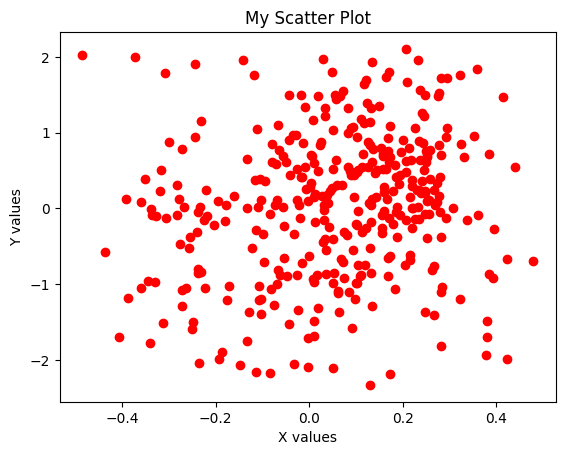

In [361]:
import matplotlib.pyplot as plt
#temp = Predictore_df[Predictore_df['Year_Month'] >= '198901']
#x = temp['Year_Month']
#plt.scatter(x, y_pred_test_s, color='blue')
plt.scatter(y_pred_test_s, y_test_MKT, color='red')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('My Scatter Plot')
plt.show()

# Volatility Random Forest

In [362]:
def extract_monthly_volitility_mean(FF_daily_df):
  df_volitility_daily = pd.DataFrame(columns=['YYYYMM', 'Volatility','SD'])
  #def volatility_from_daily(df):
  year_index = np.arange(1927, 2022, 1)
  month_index = [f'{i:02}' for i in range(1, 13)]
  FF_daily_df['year'] = FF_daily_df['YYMMDD'].str[:4]
  FF_daily_df['month'] = FF_daily_df['YYMMDD'].str[4:6]
  FF_daily_df['day'] = FF_daily_df['YYMMDD'].str[6:]
  mean_list =[]
  #FF_daily_df.head(50)
  for year in year_index:
    for month in month_index:
      sub_set_daily = FF_daily_df[(FF_daily_df['year']==str(year)) & (FF_daily_df['month']==str(month))]
      subset_copy1 = sub_set_daily.copy()
      subset_copy1['Mkt-RF'] = subset_copy1['Mkt-RF'] - (subset_copy1['Mkt-RF'].mean())
      #print (subset_copy1['Mkt-RF'].mean())
      mean_list.append(subset_copy1['Mkt-RF'].mean())
      sub_set_daily = subset_copy1

      subset_copy = sub_set_daily.copy()
      subset_copy['Mkt-RF'] = subset_copy['Mkt-RF'].astype(float).apply(lambda x: x**2)
      sub_set_daily = subset_copy
      new_index = len(df_volitility_daily) 
      #if month == '12':
        #df_volitility_daily.loc[new_index] = [str(year+1)+'01', sub_set_daily['Mkt-RF'].sum(), np.sqrt(sub_set_daily['Mkt-RF'].sum()/len(sub_set_daily['Mkt-RF']))]
      if month <'10':
        df_volitility_daily.loc[new_index] = [str(year)+ '0' +str(int(month)), sub_set_daily['Mkt-RF'].sum(), np.sqrt(sub_set_daily['Mkt-RF'].sum()/len(sub_set_daily['Mkt-RF']))]
      else:
        df_volitility_daily.loc[new_index] = [str(year)+str(int(month)), sub_set_daily['Mkt-RF'].sum(),round(np.sqrt(sub_set_daily['Mkt-RF'].sum()/len(sub_set_daily['Mkt-RF'])),3)]

  df_volitility_daily.to_csv('volitility_daily_mean.csv', index=False)
  print("this is mean of means :", np.mean(mean_list))
  return df_volitility_daily

df_volitility_RF = extract_monthly_volitility_mean(FF_daily_df)
df_volitility_RF

this is mean of means : -2.2166349691591564e-19


,YYYYMM,Volatility,SD
0,192701,3.553482,0.377014
1,192702,1.186309,0.232214
2,192703,7.316372,0.520554
3,192704,4.943252,0.444669
4,192705,1.991781,0.282261
...,...,...,...
1135,202108,5.577494,0.503510
1136,202109,11.873237,0.751926
1137,202110,9.129530,0.659000
1138,202111,12.028451,0.757000


In [363]:
df_volitility_RF = df_volitility_RF.drop('SD',axis=1)
RF_Voli_df = pd.merge(Predictore_df,df_volitility_RF, left_on='Year_Month', right_on='YYYYMM', how='inner')
RF_Voli_df= RF_Voli_df.drop(['YYYYMM','Mkt-RF'],axis =1)
RF_Voli_df

,Year_Month,d/p,e/p,bm,ntis,tbl,ltr,dfy,tms,infl,corpr,svar,lag_ex_ret,Volatility
0,192702,0.955483,0.787365,-0.447878,1.508403,-0.013657,0.180232,-0.209004,0.126656,-1.681713,0.084196,-0.504889,-0.233100,1.186309
1,192703,0.961933,0.751395,-0.286234,1.283748,-0.043625,0.881275,-0.209004,0.600377,-1.688375,0.151546,-0.306880,0.663235,7.316372
2,192704,0.945398,0.687327,-0.337202,1.459605,0.019641,-0.214901,-0.245300,-0.153765,-0.522541,0.016847,-0.406872,-0.192934,4.943252
3,192705,0.855649,0.540436,-0.423270,1.661008,-0.000338,0.269456,-0.190856,0.172939,0.650031,-0.300658,-0.472430,-0.123172,1.991781
4,192706,0.895761,0.540719,-0.354316,1.811023,-0.086912,-0.486821,-0.118263,-0.240886,1.809126,-0.040881,-0.337852,0.929599,6.347501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,202108,-1.976048,-1.292960,-1.402695,-0.049142,-1.092511,-0.342363,-0.626410,0.673886,-0.103461,-0.464220,-0.407026,0.048062,5.577494
1022,202109,-1.854373,-1.095554,-1.370258,-0.017324,-1.095840,-1.255843,-0.608262,0.091263,0.028407,-1.181010,-0.160984,0.394757,11.873237
1023,202110,-1.984358,-1.156706,-1.411965,-0.111636,-1.092511,0.023029,-0.662707,0.908024,1.162803,0.517156,-0.236325,-1.144234,9.129530
1024,202111,-1.952677,-1.038210,-1.384288,-0.015551,-1.092511,0.698579,-0.680855,1.340907,0.474172,0.204463,-0.181745,1.185393,12.028451


In [364]:
RF_Voli_df ['Vol_1'] = RF_Voli_df['Volatility'].shift(1)
RF_Voli_df ['Vol_2'] = RF_Voli_df['Volatility'].shift(2)
RF_Voli_df ['Vol_3'] = RF_Voli_df['Volatility'].shift(3)
RF_Voli_df ['main_volatility'] = RF_Voli_df['Volatility'].shift(0)
RF_Voli_df = RF_Voli_df.drop('Volatility',axis=1).dropna()
RF_Voli_df

,Year_Month,d/p,e/p,bm,ntis,tbl,ltr,dfy,tms,infl,corpr,svar,lag_ex_ret,Vol_1,Vol_2,Vol_3,main_volatility
3,192705,0.855649,0.540436,-0.423270,1.661008,-0.000338,0.269456,-0.190856,0.172939,0.650031,-0.300658,-0.472430,-0.123172,4.943252,7.316372,1.186309,1.991781
4,192706,0.895761,0.540719,-0.354316,1.811023,-0.086912,-0.486821,-0.118263,-0.240886,1.809126,-0.040881,-0.337852,0.929599,1.991781,4.943252,7.316372,6.347501
5,192707,0.780001,0.363931,-0.502514,1.850278,-0.123540,0.018780,-0.154560,0.113044,-3.980297,-0.233308,-0.461844,-0.715092,6.347501,1.991781,4.943252,1.370569
6,192708,0.705558,0.234391,-0.574302,1.629130,-0.210115,0.129247,-0.209004,0.254615,-1.695114,0.151546,-0.197369,1.314347,1.370569,6.347501,1.991781,9.673038
7,192709,0.633884,0.109778,-0.635573,3.324961,-0.216774,-0.117180,-0.281596,0.102153,0.656849,0.469050,-0.244959,0.196041,9.673038,1.370569,6.347501,7.775969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,202108,-1.976048,-1.292960,-1.402695,-0.049142,-1.092511,-0.342363,-0.626410,0.673886,-0.103461,-0.464220,-0.407026,0.048062,10.161540,4.946514,14.726732,5.577494
1022,202109,-1.854373,-1.095554,-1.370258,-0.017324,-1.095840,-1.255843,-0.608262,0.091263,0.028407,-1.181010,-0.160984,0.394757,5.577494,10.161540,4.946514,11.873237
1023,202110,-1.984358,-1.156706,-1.411965,-0.111636,-1.092511,0.023029,-0.662707,0.908024,1.162803,0.517156,-0.236325,-1.144234,11.873237,5.577494,10.161540,9.129530
1024,202111,-1.952677,-1.038210,-1.384288,-0.015551,-1.092511,0.698579,-0.680855,1.340907,0.474172,0.204463,-0.181745,1.185393,9.129530,11.873237,5.577494,12.028451


In [365]:
train_Predictore_df = RF_Voli_df[RF_Voli_df['Year_Month'] <'195801']
valid_Predictore_df = RF_Voli_df[(RF_Voli_df['Year_Month'] >= '195801') & (RF_Voli_df['Year_Month'] <'198901')]
test_Predictore_df = RF_Voli_df[RF_Voli_df['Year_Month'] >= '198901']
train_Predictore_df

,Year_Month,d/p,e/p,bm,ntis,tbl,ltr,dfy,tms,infl,corpr,svar,lag_ex_ret,Vol_1,Vol_2,Vol_3,main_volatility
3,192705,0.855649,0.540436,-0.423270,1.661008,-0.000338,0.269456,-0.190856,0.172939,0.650031,-0.300658,-0.472430,-0.123172,4.943252,7.316372,1.186309,1.991781
4,192706,0.895761,0.540719,-0.354316,1.811023,-0.086912,-0.486821,-0.118263,-0.240886,1.809126,-0.040881,-0.337852,0.929599,1.991781,4.943252,7.316372,6.347501
5,192707,0.780001,0.363931,-0.502514,1.850278,-0.123540,0.018780,-0.154560,0.113044,-3.980297,-0.233308,-0.461844,-0.715092,6.347501,1.991781,4.943252,1.370569
6,192708,0.705558,0.234391,-0.574302,1.629130,-0.210115,0.129247,-0.209004,0.254615,-1.695114,0.151546,-0.197369,1.314347,1.370569,6.347501,1.991781,9.673038
7,192709,0.633884,0.109778,-0.635573,3.324961,-0.216774,-0.117180,-0.281596,0.102153,0.656849,0.469050,-0.244959,0.196041,9.673038,1.370569,6.347501,7.775969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,195708,0.369773,0.440868,0.176943,0.839496,0.012982,-0.185160,-0.571966,-0.129262,-0.522541,-0.291036,0.073386,-0.080892,4.293864,4.644302,3.140167,16.068870
316,195709,0.519470,0.608781,0.318538,0.776408,0.066258,0.129247,-0.408633,0.028645,-0.522541,0.209274,-0.122534,-1.300670,16.068870,4.293864,4.644302,10.885416
317,195710,0.601720,0.664820,0.403134,0.947601,0.082907,-0.406095,-0.263448,-0.328007,-0.522541,-0.137095,0.940453,-1.484588,10.885416,16.068870,4.293864,41.506614
318,195711,0.579546,0.602016,0.353484,1.056738,-0.006997,2.070923,-0.045671,1.332739,0.194261,1.248378,0.490892,-1.133664,41.506614,10.885416,16.068870,28.291230


In [366]:
import math
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score


x_train = train_Predictore_df.iloc[:,:16]
#x_train = x_train.drop(['Year_Month','tms','bm'], axis=1)
x_train = x_train.drop(['Year_Month'], axis=1)
y_train = train_Predictore_df.iloc[:,16]

x_valid = valid_Predictore_df.iloc[:,:16]
#x_valid = x_valid.drop(['Year_Month','tms','bm'], axis=1)
x_valid = x_valid.drop(['Year_Month'], axis=1)
y_valid = valid_Predictore_df.iloc[:,16]
      

maxfeatures = list(range(3, 14,3))
maxfeatures.append(int(math.sqrt(len(x_train.columns))))
maxfeatures.append(int(math.log2(len(x_train.columns))))
dict_winner = {}
min_samples_split_list = [0.2,0.5,0.9]
best_min_samples_split_list=[]
estimator=[50,200,500]
for i in maxfeatures:
  best_depth = []
  for e in estimator:
    
    for j in min_samples_split_list:
      
      for k in range(1,20,3):
        regressor = RandomForestRegressor(n_estimators=e, max_depth = k,max_features=i,min_samples_split=j,random_state=42)
        regressor.fit(x_train, y_train)    
        y_pred = regressor.predict(x_valid)
              #mse = mean_squared_error(y_valid, y_pred)
        r2 = r2_score(y_valid, y_pred)
        best_depth.append([r2,j,k,e])
      
      
  dict_winner[i] = [max(best_depth)]

dict_winner

{3: [[-0.6477421779635726, 0.5, 19, 500]],
 6: [[0.28559675787064076, 0.2, 19, 200]],
 9: [[0.59649196732087, 0.2, 19, 500]],
 12: [[0.7902105972091673, 0.2, 19, 200]]}

In [99]:
# X_train_df = RF_Voli_df[RF_Voli_df['Year_Month'] <'198901']

# test_Predictore_df = RF_Voli_df[RF_Voli_df['Year_Month'] >= '198901']
# x_train_larg = X_train_df.iloc[:,:16]
# #x_train_larg = x_train_larg.drop(['Year_Month','tms','bm'], axis=1)
# x_train_larg = x_train_larg.drop(['Year_Month'], axis=1)

# y_train_larg= X_train_df.iloc[:,16]
# test_Predictore_df =test_Predictore_df.dropna()

# x_test = test_Predictore_df.iloc[:,:16]
# #x_test = x_test.drop(['Year_Month','tms','bm'], axis=1)
# x_test = x_test.drop(['Year_Month'], axis=1)

# y_test = test_Predictore_df.iloc[:,16]
# r2_main_list = []
# for i in dict_winner:
#   regressor = RandomForestRegressor(n_estimators=dict_winner[i][0][3], max_depth = dict_winner[i][0][2],max_features=i,min_samples_split=dict_winner[i][0][1])
#   regressor.fit(x_train_larg, y_train_larg)    
#   y_pred_test = regressor.predict(x_test)

#   r2_main = r2_score(y_test, y_pred_test)
#   r2_main_list.append(r2_main)
# r2_main_list

# RandomForest Portfolio

In [367]:
X_train_df = RF_Voli_df[RF_Voli_df['Year_Month'] <'198901']

test_Predictore_df = RF_Voli_df[RF_Voli_df['Year_Month'] >= '198901']
x_train_larg = X_train_df.iloc[:,:16]
#x_train_larg = x_train_larg.drop(['Year_Month','tms','bm'], axis=1)
x_train_larg = x_train_larg.drop(['Year_Month'], axis=1)

y_train_larg= X_train_df.iloc[:,16]
test_Predictore_df =test_Predictore_df.dropna()

x_test = test_Predictore_df.iloc[:,:16]
#x_test = x_test.drop(['Year_Month','tms','bm'], axis=1)
x_test = x_test.drop(['Year_Month'], axis=1)

y_test = test_Predictore_df.iloc[:,16]

r2_adding_list = []
y_pred_test_voli = []
for i in range(len(x_test)):
  regressor = RandomForestRegressor(n_estimators=200, max_depth = 19,max_features=12,min_samples_split=0.2,random_state=42)
  regressor.fit(x_train_larg, y_train_larg)    
  y_pred_test_temp_voli = regressor.predict((x_test.iloc[i:i+1,:]))

  y_pred_test_voli.append(y_pred_test_temp_voli)
  # r2_adding = r2_score(y_test, y_pred_test)
  # r2_adding_list.append(r2_adding)
  x_train_larg = pd.concat([x_train_larg,x_test.iloc[i:i+1,:]],ignore_index=True)
  #print(x_train_larg)
  s = pd.Series(y_test.iloc[i])
  y_train_larg = pd.concat([y_train_larg,s],ignore_index=True)
  #y_train_larg.columns = y_train_larg.columns.astype(str)

y_train_larg

0        1.991781
1        6.347501
2        1.370569
3        9.673038
4        7.775969
          ...    
1018     5.577494
1019    11.873237
1020     9.129530
1021    12.028451
1022    25.097356
Length: 1023, dtype: float64

In [368]:
x_train_larg

,d/p,e/p,bm,ntis,tbl,ltr,dfy,tms,infl,corpr,svar,lag_ex_ret,Vol_1,Vol_2,Vol_3
0,0.855649,0.540436,-0.423270,1.661008,-0.000338,0.269456,-0.190856,0.172939,0.650031,-0.300658,-0.472430,-0.123172,4.943252,7.316372,1.186309
1,0.895761,0.540719,-0.354316,1.811023,-0.086912,-0.486821,-0.118263,-0.240886,1.809126,-0.040881,-0.337852,0.929599,1.991781,4.943252,7.316372
2,0.780001,0.363931,-0.502514,1.850278,-0.123540,0.018780,-0.154560,0.113044,-3.980297,-0.233308,-0.461844,-0.715092,6.347501,1.991781,4.943252
3,0.705558,0.234391,-0.574302,1.629130,-0.210115,0.129247,-0.209004,0.254615,-1.695114,0.151546,-0.197369,1.314347,1.370569,6.347501,1.991781
4,0.633884,0.109778,-0.635573,3.324961,-0.216774,-0.117180,-0.281596,0.102153,0.656849,0.469050,-0.244959,0.196041,9.673038,1.370569,6.347501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,-1.976048,-1.292960,-1.402695,-0.049142,-1.092511,-0.342363,-0.626410,0.673886,-0.103461,-0.464220,-0.407026,0.048062,10.161540,4.946514,14.726732
1019,-1.854373,-1.095554,-1.370258,-0.017324,-1.095840,-1.255843,-0.608262,0.091263,0.028407,-1.181010,-0.160984,0.394757,5.577494,10.161540,4.946514
1020,-1.984358,-1.156706,-1.411965,-0.111636,-1.092511,0.023029,-0.662707,0.908024,1.162803,0.517156,-0.236325,-1.144234,11.873237,5.577494,10.161540
1021,-1.952677,-1.038210,-1.384288,-0.015551,-1.092511,0.698579,-0.680855,1.340907,0.474172,0.204463,-0.181745,1.185393,9.129530,11.873237,5.577494


In [65]:
#y_pred_test_voli

In [369]:
Mkt_s = pd.Series(y_pred_test)
Mkt_s[0]

array([0.06552556])

In [370]:
def w__Random_forest(y_pred_test,y_pred_test_voli):


  gama = 4
  w_RF = []
  Mkt_Rf = pd.Series(y_pred_test)
  Volatility = pd.Series(y_pred_test_voli)
  for i in range(len(Mkt_Rf)):

    w_RF.append((Mkt_Rf[i]/(4*y_pred_test_voli[i])))
  w_RF = pd.Series(w_RF)
  return w_RF

w_RF = w__Random_forest(y_pred_test,y_pred_test_voli)
w_RF

0        [0.002362961668691296]
1       [-0.011117548495765815]
2        [-0.00509404614282915]
3      [-0.0012531286396326947]
4        [0.011151238878978727]
                 ...           
360      [0.006419368761377313]
361     [0.0025797997499408987]
362     [0.0035037363542705156]
363     [0.0034924895865059763]
364    [-0.0011760508488333286]
Length: 365, dtype: object

In [371]:
w_RF_s = []
import matplotlib.pyplot as plt
for k in range(len(w_RF)):
  w_RF_s.append(w_RF[k][0])

for i in range(len(w_RF_s)):
  if w_RF_s[i] > 1:
    w_RF_s[i] = 1
  elif w_RF_s[i]<0:
    w_RF_s[i] = 0

w_RF_s

[0.002362961668691296,
 0,
 0,
 0,
 0.011151238878978727,
 0.014420807160439874,
 0.006174228599018522,
 0,
 0,
 0.0016411579446735537,
 0,
 0,
 0,
 0,
 0,
 0.006495726093968919,
 0.0016891345515667598,
 0,
 0.0002591606713862526,
 0.0038463738020236486,
 0.009233650350216189,
 0.0011227433248714239,
 0.0007983990788773069,
 0.005862087909140273,
 0.003267569356028004,
 0,
 0,
 0.00994415659169656,
 0.0038884034582024932,
 0.013344656449223048,
 0.001334656112354267,
 0,
 0,
 0,
 0,
 0,
 0.005286666935447958,
 0.0022053805315532973,
 0.008675243783928553,
 0,
 0,
 0,
 0,
 0.007251920405711735,
 0.0025925335768466834,
 0.004090011228142814,
 0,
 0,
 0,
 0.012393550163366721,
 0.0024504035233155457,
 0.011249946317499846,
 0,
 0,
 0,
 0.003172049343746961,
 0.007078264282458809,
 0,
 0,
 0,
 0,
 0,
 0.013237660995013431,
 0,
 0,
 0,
 0.0004429038339301673,
 0.011416244936090645,
 0.014763205743554058,
 0.01241791166025413,
 0.00036449206176111733,
 0.01681823940210678,
 0.017042987401868

In [379]:

Final_df = pd.merge(Predictore_df,FF_monthly_df, left_on='Year_Month', right_on='Year_Month', how='inner')
Final_df = Final_df.drop(['Mkt-RF_y','SMB','HML'],axis = 1)
Final_df ['MKT'] = Final_df ['Mkt-RF_x'] + Final_df['RF']
Final_df=Final_df [Final_df['Year_Month']>='198901']
#w_RF_s = pd.DataFrame(w_RF)

Final_df ['w_RF'] = w_RF_s
Final_df

,Year_Month,d/p,e/p,bm,ntis,tbl,ltr,dfy,tms,infl,corpr,svar,lag_ex_ret,Mkt-RF_x,RF,MKT,w_RF
661,198901,0.031667,0.590640,-0.438991,-1.622938,1.644582,0.668838,-0.009375,-0.916074,0.487526,0.724015,-0.294325,0.094570,1.484402,1.116694,2.601096,0.002363
662,198902,0.113757,0.702840,-0.376279,-1.727115,1.731156,-0.954183,-0.118263,-2.026868,0.315011,-0.868317,-0.228565,1.069123,-0.956967,1.354133,0.397166,0.000000
663,198903,0.088246,0.692330,-0.290440,-1.654308,1.827721,0.324689,-0.299745,-1.286339,0.645210,0.060143,-0.194248,-0.696066,0.159923,1.591573,1.751495,0.000000
664,198904,0.008560,0.581417,-0.385458,-1.641611,1.771114,0.481893,-0.390485,-1.139322,0.804393,0.776933,-0.297120,0.111482,0.966890,1.591573,2.558463,0.000000
665,198905,-0.040586,0.505495,-0.428524,-1.849389,1.697858,1.510089,-0.263448,-0.420573,0.630981,1.575504,-0.260597,0.694945,0.680358,2.066451,2.746810,0.011151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,202108,-1.976048,-1.292960,-1.402695,-0.049142,-1.092511,-0.342363,-0.626410,0.673886,-0.103461,-0.464220,-0.407026,0.048062,0.551711,-1.059834,-0.508122,0.006419
1022,202109,-1.854373,-1.095554,-1.370258,-0.017324,-1.095840,-1.255843,-0.608262,0.091263,0.028407,-1.181010,-0.160984,0.394757,-1.576812,-1.059834,-2.636646,0.002580
1023,202110,-1.984358,-1.156706,-1.411965,-0.111636,-1.092511,0.023029,-0.662707,0.908024,1.162803,0.517156,-0.236325,-1.144234,1.645211,-1.059834,0.585377,0.003504
1024,202111,-1.952677,-1.038210,-1.384288,-0.015551,-1.092511,0.698579,-0.680855,1.340907,0.474172,0.204463,-0.181745,1.185393,-0.752302,-1.059834,-1.812135,0.003492


In [380]:
Final_df['return'] = (Final_df['MKT'] * Final_df['w_RF']) + ((1-Final_df['w_RF']) * Final_df['RF'])
Final_df

,Year_Month,d/p,e/p,bm,ntis,tbl,ltr,dfy,tms,infl,corpr,svar,lag_ex_ret,Mkt-RF_x,RF,MKT,w_RF,return
661,198901,0.031667,0.590640,-0.438991,-1.622938,1.644582,0.668838,-0.009375,-0.916074,0.487526,0.724015,-0.294325,0.094570,1.484402,1.116694,2.601096,0.002363,1.120202
662,198902,0.113757,0.702840,-0.376279,-1.727115,1.731156,-0.954183,-0.118263,-2.026868,0.315011,-0.868317,-0.228565,1.069123,-0.956967,1.354133,0.397166,0.000000,1.354133
663,198903,0.088246,0.692330,-0.290440,-1.654308,1.827721,0.324689,-0.299745,-1.286339,0.645210,0.060143,-0.194248,-0.696066,0.159923,1.591573,1.751495,0.000000,1.591573
664,198904,0.008560,0.581417,-0.385458,-1.641611,1.771114,0.481893,-0.390485,-1.139322,0.804393,0.776933,-0.297120,0.111482,0.966890,1.591573,2.558463,0.000000,1.591573
665,198905,-0.040586,0.505495,-0.428524,-1.849389,1.697858,1.510089,-0.263448,-0.420573,0.630981,1.575504,-0.260597,0.694945,0.680358,2.066451,2.746810,0.011151,2.074038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,202108,-1.976048,-1.292960,-1.402695,-0.049142,-1.092511,-0.342363,-0.626410,0.673886,-0.103461,-0.464220,-0.407026,0.048062,0.551711,-1.059834,-0.508122,0.006419,-1.056292
1022,202109,-1.854373,-1.095554,-1.370258,-0.017324,-1.095840,-1.255843,-0.608262,0.091263,0.028407,-1.181010,-0.160984,0.394757,-1.576812,-1.059834,-2.636646,0.002580,-1.063901
1023,202110,-1.984358,-1.156706,-1.411965,-0.111636,-1.092511,0.023029,-0.662707,0.908024,1.162803,0.517156,-0.236325,-1.144234,1.645211,-1.059834,0.585377,0.003504,-1.054069
1024,202111,-1.952677,-1.038210,-1.384288,-0.015551,-1.092511,0.698579,-0.680855,1.340907,0.474172,0.204463,-0.181745,1.185393,-0.752302,-1.059834,-1.812135,0.003492,-1.062461


In [382]:
Final_df.to_csv('finalDF14.csv', index=False)

In [383]:
y_pred_test_s = pd.Series(y_pred_test_s)
y_pred_test_s[0]

0.06552556402792088

# Volatility accuracy 

In [376]:
y_pred_test_voli

y_pred_test_voli_s = []
for k in range(len(y_pred_test_voli)):
  y_pred_test_voli_s.append(y_pred_test_voli[k][0])
#y_pred_test_voli_s

In [377]:
y_test_voli = y_test.reset_index(drop=True)

In [378]:
def calculate_r2(actual_values, forecast_values):
    numerator = sum([(forecast_values[i] - actual_values[i])**2 for i in range(len(actual_values))])
    denominator = sum([(actual_values.mean() - actual_values[i])**2 for i in range(len(actual_values))])
    r2 = 1 - (numerator / denominator)
    return r2

calculate_r2(y_test_voli,y_pred_test_voli_s)

0.8586136525911366

In [233]:
def calculate_directional_accuracy(actual_values, forecast_values):
    correct_direction = 0
    for i in range(1, len(actual_values)):
        if (actual_values[i] - actual_values[i-1]) * (forecast_values[i] - actual_values[i-1]) > 0:
            correct_direction += 1
    directional_accuracy = correct_direction / (len(actual_values)-1)
    return directional_accuracy
calculate_directional_accuracy(y_test_voli,y_pred_test_voli_s)

0.8986301369863013